In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os

pd.set_option('mode.chained_assignment', None)

file = "./music_dataset/static_annotations.csv"
dataset = pd.read_csv(file)
dataset.describe()

,song_id,mean_arousal,std_arousal,mean_valence,std_valence
count,744.000000,744.000000,744.000000,744.000000,744.000000
mean,472.801075,4.786459,1.646668,5.006063,1.564322
std,286.930192,1.376034,0.422581,1.245554,0.415570
min,2.000000,1.600000,0.632460,1.600000,0.483050
25%,218.750000,3.700000,1.364875,4.100000,1.264900
50%,450.500000,4.800000,1.649900,5.000000,1.595100
75%,718.250000,5.900000,1.932200,5.900000,1.840900
max,1000.000000,8.400000,2.846000,8.100000,2.668700


In [2]:
dataset

,song_id,mean_arousal,std_arousal,mean_valence,std_valence
0,745,4.2,1.13530,1.6,0.69921
1,45,5.1,2.55820,2.1,1.44910
2,133,2.8,2.09760,2.2,1.22930
3,204,3.6,2.11870,2.2,1.03280
4,173,4.6,1.77640,2.2,1.22930
...,...,...,...,...,...
739,629,7.4,0.96609,7.6,0.84327
740,960,7.7,1.33750,7.7,0.82327
741,640,7.6,0.84327,7.8,0.78881
742,115,8.4,0.69921,7.8,1.22930


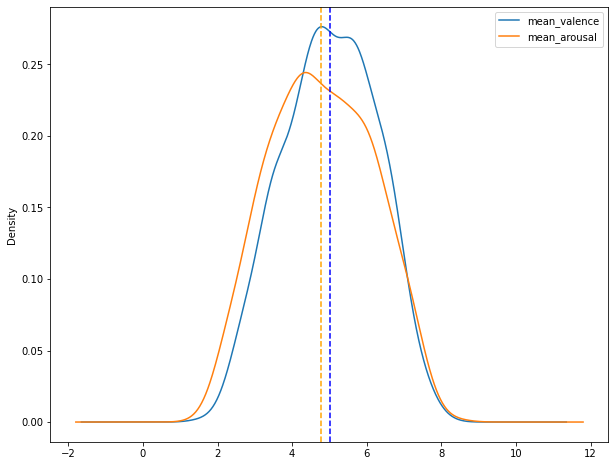

In [3]:
graph = dataset[["mean_valence", "mean_arousal"]].plot.kde(figsize=(10, 8))
graph.axvline(dataset["mean_valence"].mean(), color="blue", linestyle="--")
graph.axvline(dataset["mean_arousal"].mean(), color="orange", linestyle="--")

In [4]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# fit on training data column
scale_a = StandardScaler().fit(dataset[['mean_arousal']])
scale_v = StandardScaler().fit(dataset[['mean_valence']])

# transform the training data column
dataset['mean_arousal'] = scale_a.transform(dataset[['mean_arousal']])
dataset['mean_valence'] = scale_v.transform(dataset[['mean_valence']])

dataset.describe()

,song_id,mean_arousal,std_arousal,mean_valence,std_valence
count,744.000000,7.440000e+02,744.000000,7.440000e+02,744.000000
mean,472.801075,1.910061e-16,1.646668,1.528049e-16,1.564322
std,286.930192,1.000673e+00,0.422581,1.000673e+00,0.415570
min,2.000000,-2.317240e+00,0.632460,-2.736417e+00,0.483050
25%,218.750000,-7.900890e-01,1.364875,-7.279275e-01,1.264900
50%,450.500000,9.847409e-03,1.649900,-4.871235e-03,1.595100
75%,718.250000,8.097838e-01,1.932200,7.181850e-01,1.840900
max,1000.000000,2.627821e+00,2.846000,2.485656e+00,2.668700


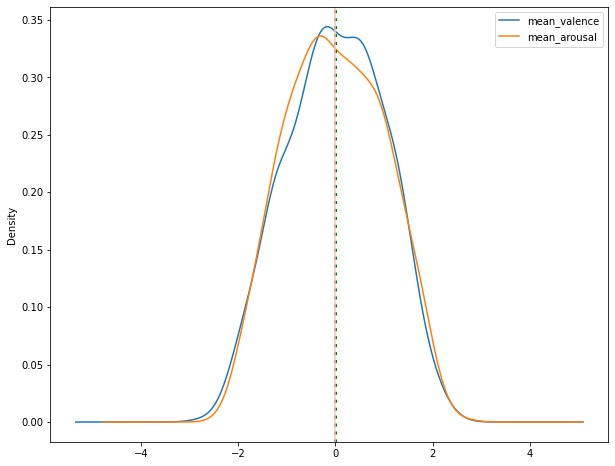

In [5]:
graph_s = dataset[["mean_valence", "mean_arousal"]].plot.kde(figsize=(10, 8))
graph_s.axvline(dataset["mean_valence"].mean(), color="green", linestyle=":", linewidth=3)
graph_s.axvline(dataset["mean_arousal"].mean(), color="pink", linestyle="-")

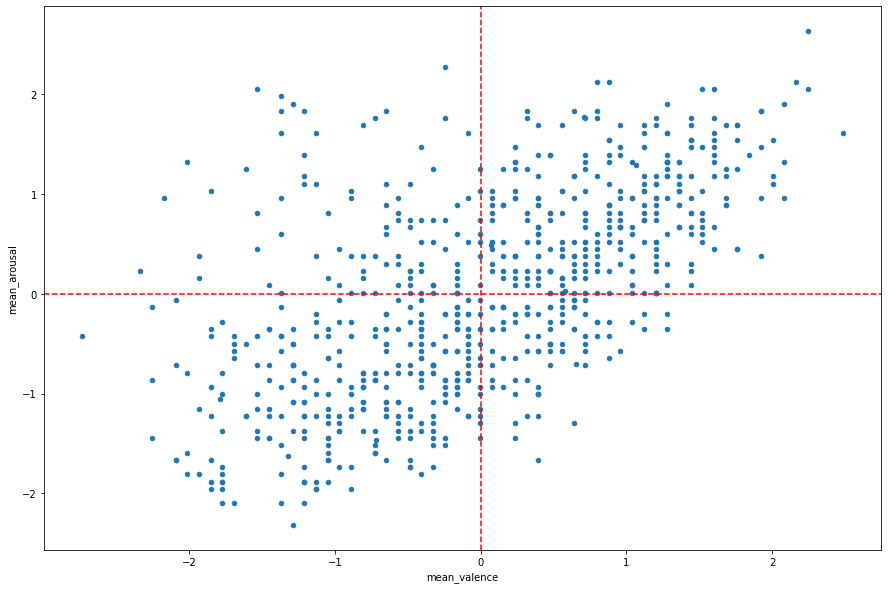

In [6]:
ax=dataset.plot.scatter(x='mean_valence', y='mean_arousal', figsize=(15, 10))
ax.axhline(0, color="red", linestyle="--")
ax.axvline(0, color="red", linestyle="--")


In [7]:
q4 = dataset.query(' mean_arousal < 0 & mean_valence > 0')
# Top 10 more positive valence when arousal is low
q4.sort_values(by="mean_valence", ascending=False).head(10)

,song_id,mean_arousal,std_arousal,mean_valence,std_valence
658,319,-0.208317,2.0683,1.280562,0.84327
657,308,-0.353760,1.7670,1.280562,0.96609
623,265,-0.208317,1.7795,1.119883,0.69921
622,60,-0.353760,1.5670,1.119883,0.51640
609,672,-0.281039,2.4585,1.039543,1.82880
595,157,-0.571925,1.7638,0.959204,1.13530
578,607,-0.281039,1.8379,0.878864,1.37030
577,245,-0.426482,2.0976,0.878864,1.66330
576,985,-0.644646,1.9120,0.878864,1.28670
562,129,-0.426482,1.8135,0.798525,1.76380


In [11]:
q4.query('song_id == 129 or song_id == 362 or song_id == 999')

,song_id,mean_arousal,std_arousal,mean_valence,std_valence,color,size
539,362,-0.571925,1.7638,0.718185,0.8756,red,150
540,999,-0.499203,2.4244,0.718185,1.6633,red,150
562,129,-0.426482,1.8135,0.798525,1.7638,red,150


381    Text(0.07546835028908606, -0.9355319782449443,...
382    Text(0.07546835028908606, -0.8628104869402803,...
383    Text(0.07546835028908606, -0.7173675043309525,...
384    Text(0.07546835028908606, -0.5719245217216246,...
385    Text(0.07546835028908606, -0.35376004780763287...
                             ...                        
609    Text(1.0395433770543683, -0.28103855650296855,...
622    Text(1.1198829626181424, -0.35376004780763287,...
623    Text(1.1198829626181424, -0.20831706519830487,...
657    Text(1.2805621337456887, -0.35376004780763287,...
658    Text(1.2805621337456887, -0.20831706519830487,...
Length: 82, dtype: object

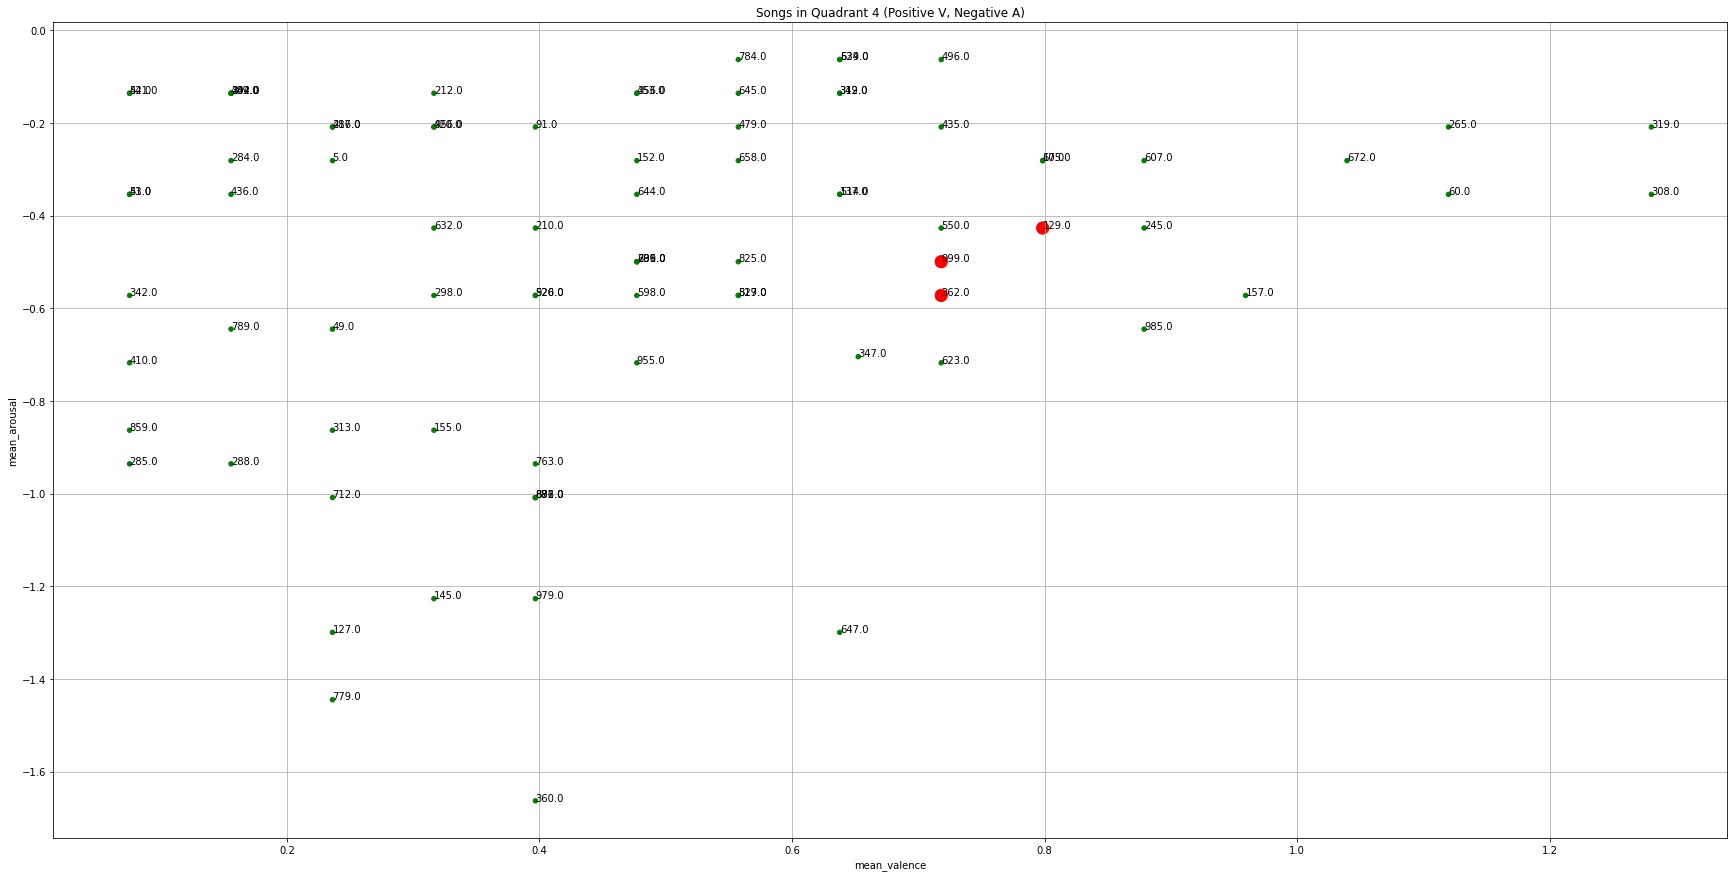

In [8]:
q4.loc[:,'color'] = 'green'
q4.loc[:,'size'] = 20
q4.loc[q4.song_id.isin([129,362,999]), 'color'] = 'red'
q4.loc[q4.song_id.isin([129,362,999]), 'size'] = 150
q4_fig = q4.plot.scatter(x='mean_valence', y='mean_arousal', 
                figsize=(30, 15), c='color', s='size', 
                title="Songs in Quadrant 4 (Positive V, Negative A)",
               grid=True)
q4[['mean_valence', 'mean_arousal', 'song_id']].apply(lambda x: q4_fig.text(*x), axis=1)

### 129 is classic music - Selected
### 362 is country music - Selected
### 999 is rock music - Selected

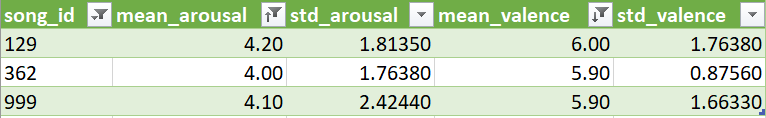

#### 157 is classic music - neighbors are not selectable - discarded
#### 985 is rock but contain voice - discarded
#### 347 is folk but contain voice - discarded
#### 550 is folk but contain voice - discarded